# The Derivative
Goals for this notebook: 

 - Limits on python 
 
 - Understand a definition of the derivative

 - Interpret derivative as a function

 - Interpret derivative as slope of tangent line
 
 - Use python to compute derivatives and use examples to conjecture rules for computing derivatives. 
 


## Reminder: Run all cells before you work on this each time


In [1]:
# importing libraries we need. 
%matplotlib inline
import matplotlib.pyplot as plt   #helps us plot
import numpy as np  #numpy python's numeric library
import sympy as sy  # sympy python's symbolic library
from sympy import oo

## Limits 
Last class we discussed limits. We estimated them by looking at graphs and by plugging in values closer and closer to the x we were approaching. 
Let's let python do some of that for us.  

The other day we considered 
$$\lim_{x \rightarrow 0}\frac{1}{x}$$
and 

$$\lim_{x \rightarrow \infty}\frac{1}{x}$$

Let's plot these and consider these limits again

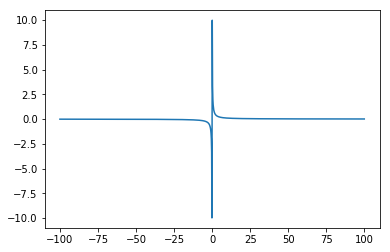

In [484]:
x=np.linspace(-100,100,1000)  #define's x as numbers from -100 to 100 in 1000 evenly spaced
plt.plot(x, 1/x)    #plots input (x) and output 1/x

In [485]:

x =sy.Symbol('x')  #define x as a symbol


sy.limit(1/x, x, 0)  
# does the limit of f(x)=1/x as x approaches 0,  first list the function, then the variable of interest, them the x you are approaching, then can put from the right 


oo

That's a problem though because that is not the limit as x approaches 0, let's look at the one sided limits. 

In [486]:
# does the limit of f(x)=1/x as x approaches 0,  first list the function, then the variable of interest, them the x you are approaching, then can put from the left or right 
sy.limit(1/x,x,0,'-')

-oo

In [487]:
sy.limit(1/x,x,0,'+')

oo

### Example
The average cost per disc in dollars incurred by Herald Records in pressing $x$ DVs is given by this average cost functions $$\bar{C}(x)= 2.2 + \frac{2500}{x}$$

Estimate $\lim_{x \rightarrow \infty}\bar{C(x)}$ and interpret the result. 

# Slope and Differences

We will discuss some problems with differences.  We want to note some connections between these operations, and remind ourselves on the important concept of **slope**.  

- Recognize patterns in differences of sequences over small intervals

- Connect patterns in differences to the nature of original sequence

- Determine slope for sequences changing in linear, quadratic, exponential, and trigonometric fashion

We will examine some arbitrary sequences.  Take, for example the numbers:

$$ f = 0 , 2,  6,  7,  4,  9$$

First, we want to examine the differences between terms.  One way we can do this is similar to our earlier work generating seqences.  To start, we will find the difference between 2 and 0, then 6 and 2, then 7 and 4, then 9 and 4.  Manually this is easy, but we can also consider this as a list and operate on these numbers based on their index.



In [488]:
f = [0, 2, 6, 7, 4, 9]  #define f to  be this sequence of numbers

In [489]:
f[1], f[0]  #showing the f[1] is really calling the second of the list, will need these to do differences

(2, 0)

In [490]:
f[1] - f[0], f[2] - f[1]  #shows f(1)-f(0) and f(2)-f(1)

(2, 4)

In the end, we would have the following list $v$ formed by the subractions starting with index $i = 0$.

$$\displaystyle f_1 - f_0, ~f_2 - f_1, ~f_3 - f_2,~ f_4 - f_3, ~f_5 - f_4$$

or 

$$v_i =  f_i - f_{i-1}$$

We can create this sequence with a for loop.

In [491]:
v = [] # what we are calling the list of differences below we create the loop for finding differences
n = len(f)  #returns the number of items in our list
n
for i in range(n-1):
    next = f[i+1] - f[i]    #finds the next element by subtracting the number before it from the next
    v.append(next)
    
v  #prints the items in v

[2, 4, 1, -3, 5]

In [492]:
sum(v)   #adds up the elements in the list v

9

In [493]:
difs = np.diff(f)  #uses the command np.diff to find the differences of our list
difs

array([ 2,  4,  1, -3,  5])

In [494]:
sum(difs)

9

Text(0.5,1,'Plot of differences $v$')

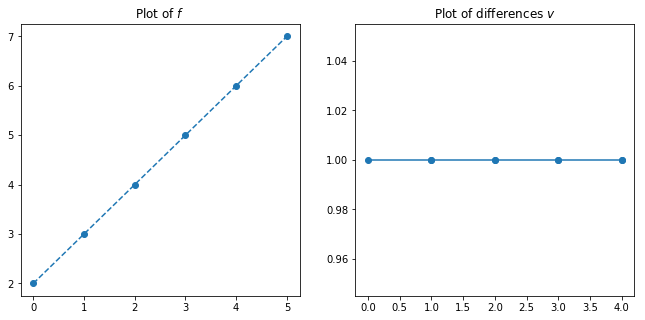

In [495]:
f = [2, 3, 4, 5, 6, 7]  #new sequence 
difs = np.diff(f)   #this will compute the difference of our sequence of numbers

plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)  #this will allow us to plot them beside each other input in subplot() is rows of graphs, columns, and the index (order that graph is)
plt.plot(f, '--o')  #plot dashed lines with our points 
plt.title("Plot of $f$")  #title

plt.subplot(1, 2, 2)  
plt.step(difs, '--o', where = 'post')
plt.title("Plot of differences $v$") 

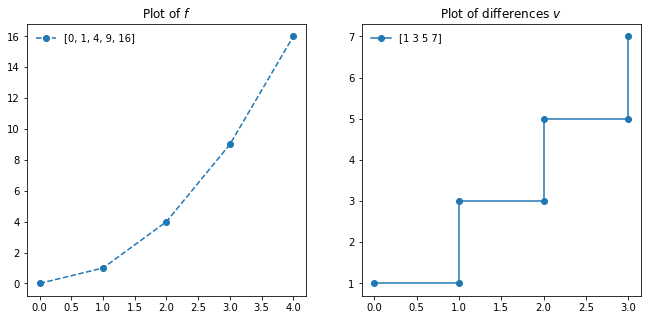

In [496]:
f = [0, 1, 4, 9, 16]
difs = np.diff(f)

plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o', label = f)
plt.title("Plot of $f$")
plt.legend(loc = 'best', frameon = False)


plt.subplot(1, 2, 2)
plt.step(difs, '--o', where = 'post', label = difs)
plt.title("Plot of differences $v$")
plt.legend(loc = 'best', frameon = False)




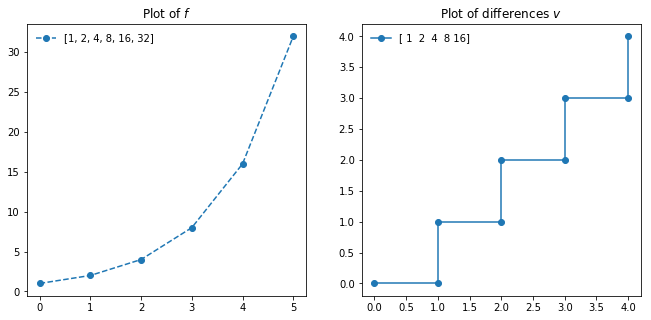

In [497]:
f = [1, 2, 4, 8, 16, 32]  
difs = np.diff(f)  # computes the differences

plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o', label = f)
plt.title("Plot of $f$")
plt.legend(loc = 'best', frameon = False)


plt.subplot(1, 2, 2)
plt.step(np.arange(len(difs)), '--o', where = 'post', label = difs)
plt.title("Plot of differences $v$")
plt.legend(loc = 'best', frameon = False)




# Connections to Slope

Recall from high school algebra, the notion of slope as rate of change.  If we have two points $(0, 0)$ and $(2, 3)$ and a line between them, we measure the slope of this line as the ratio of change in the vertical direction to that of change in the horizontal direction or:

$$\text{slope} = \frac{\text{change in } y}{\text{change in } x} = \frac{\Delta y}{\Delta x}$$

You can verify that the plots on the right side of the figures represent the slope of the line on the left side of the plot.  We have also generated plots where the distance between points is a single unit, and can imagine that we would want to move to the the continuous analogies to our sequences above.  Let's start by making plots of twice as many points on the same domains for linear, quadratic, and exponential.

In [498]:
f = [i for i in np.arange(0, 5.5, 0.5)]  # list from 0 to 5 counting by 5's

In [499]:
f

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [500]:
difs = np.diff(f)/0.5   #computes the differences between elements
difs

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [501]:
difs/0.5

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

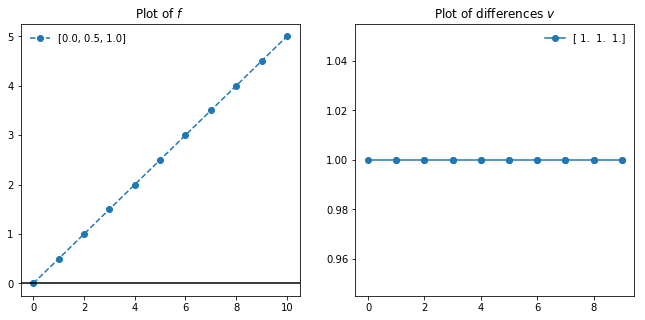

In [502]:
plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o', label = f[0:3])
plt.axhline(color = 'black')
plt.title("Plot of $f$")
plt.legend(loc = 'best', frameon = False)


plt.subplot(1, 2, 2)
plt.step( difs, '--o', where = 'post', label = difs[0:3])
plt.title("Plot of differences $v$")
plt.legend(loc = 'best', frameon = False)

In [503]:
f = [i**2 for i in np.arange(0, 5.5, 0.5)]
f

[0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0]

In [504]:
difs = np.diff(f)/0.5
difs

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

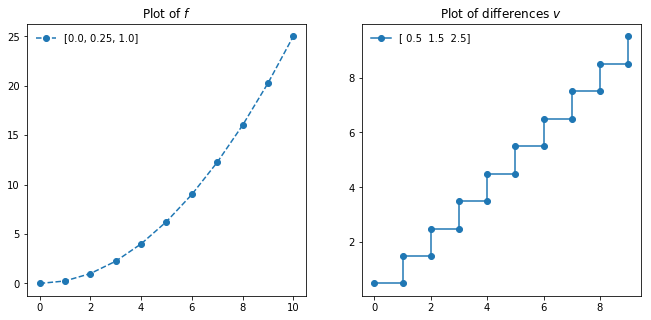

In [505]:
plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o', label = f[0:3])
plt.title("Plot of $f$")
plt.legend(loc = 'best', frameon = False)


plt.subplot(1, 2, 2)
plt.step( difs, '--o', where = 'post', label = difs[0:3])
plt.title("Plot of differences $v$")
plt.legend(loc = 'best', frameon = False)

In [506]:
f = [2**i for i in np.arange(0, 5.5, 0.5)]

difs = np.diff(f)/0.5


In [507]:
f

[1.0,
 1.4142135623730951,
 2.0,
 2.8284271247461903,
 4.0,
 5.6568542494923806,
 8.0,
 11.313708498984761,
 16.0,
 22.627416997969522,
 32.0]

In [508]:
difs

array([  0.82842712,   1.17157288,   1.65685425,   2.34314575,
         3.3137085 ,   4.6862915 ,   6.627417  ,   9.372583  ,
        13.254834  ,  18.745166  ])

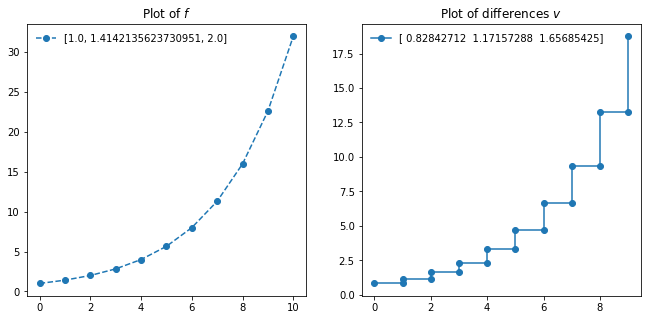

In [509]:
plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o', label = f[0:3])
plt.title("Plot of $f$")
plt.legend(loc = 'best', frameon = False)


plt.subplot(1, 2, 2)
plt.step(difs, '--o', where = 'post', label = difs[0:3])
plt.title("Plot of differences $v$")
plt.legend(loc = 'best', frameon = False)

## Adding Many Points

We recognize the sequences in closed form for linear, quadratic, and exponential functions here.  Remember however, that when we were plotting these functions, we were really just using a large number of points to plug into our function.  This means we can still use the plotting instructions from above.  

One difference is that we will need to compute the width of the intervals based on how many points we are using.  For example, if we use 1000 points on the interval [0, 5], the intervals are each 

$$\frac{5}{1000} = \frac{1}{200}$$.  

We can divide the entire list of differences by this with the division operation, and we will have our differences to plot.  In general, for any interval $[a, b]$ with $n$ subdivisions, we will have

$$\Delta x = \frac{b-a}{n}$$

Text(0.5,1,'Plot of differences $v$')

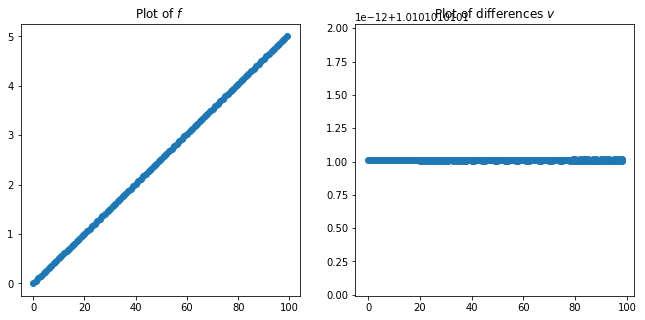

In [510]:
def f(x):
    return x

a = 0
b = 5
n = 100
w = (b - a)/n

x = np.linspace(a, b, n)
f = f(x)
difs = np.diff(f)/w

plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o')
plt.title("Plot of $f$")



plt.subplot(1, 2, 2)
plt.step(difs, '--o', where = 'post')
plt.title("Plot of differences $v$")

In [511]:
def f(x):
    return x**2

a = 0
b = 5
n = 1000
w = (b - a)/n

x = np.linspace(a, b, n)
f = f(x)

In [512]:
difs = np.diff(f)/w

Text(0.5,1,'Plot of differences $v$')

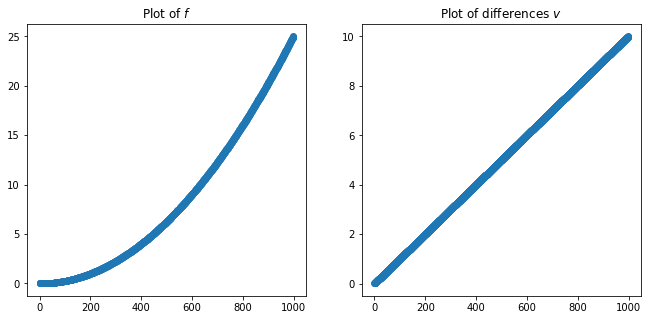

In [513]:
plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o')
plt.title("Plot of $f$")



plt.subplot(1, 2, 2)
plt.step(difs, '--o', where = 'post')
plt.title("Plot of differences $v$")

Text(0.5,1,'Plot of differences $v$')

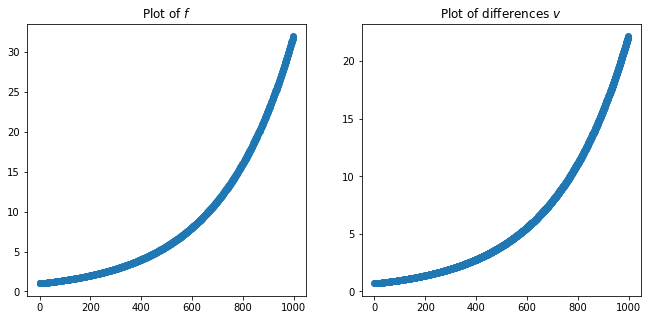

In [514]:
def f(x):
    return 2**x

a = 0
b = 5
n = 1000
w = (b - a)/n

x = np.linspace(a, b, n)
f = f(x)
difs = np.diff(f)/w

plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(f, '--o')
plt.title("Plot of $f$")



plt.subplot(1, 2, 2)
plt.step(difs, '--o', where = 'post')
plt.title("Plot of differences $v$")

We were investigating the connection between a sequence of values and smaller and smaller intervals for differences between these terms.  Now, we will investigate some formal definitions for this operation of successively smaller differences as a **Derivative**.  The big idea is that we have a function $f$, we can define it's derivative as:

$$f'(x) =  \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

When we added more and more points we were making $\Delta x$ smaller

We can interpret the derivative in a few ways.  As we started looking at the difference between terms, we can consider the derivative as a measure of the **rate of change** of some sequence of numbers.

Similarly, if we have a closed form sequence rather than a sequence we can regard the derivative as a function that represents the **rate of change** of our original function.

## Derivative as Function with Python

First, we can investigate the derivative of a function using Sympy's `diff` function.  If we enter a symbolic expression $f$ in terms of some variable $x$, we will be able to get the derivative of this expression with `sy.diff(f, x)`.  A simple example follows.

In [515]:
x = sy.Symbol('x')  #defines x as a symbol
f = x**2 - 2*x + 1  # defines f as this function 
sy.diff(f, x)          #takes the derivative of f with respect to x

2*x - 2

In [516]:
sy.diff(f, x, 2)     #take the derivative of f with respect to x and then evaluates at 2

2

Similarly, we can define a function that is a good approximation for the derivative by assigning a very small change $dx$.  For example, we define the function above in our familiar fashion, and use the definition above for a derivative function `df`. 

In [517]:
def f(x):
    return x**2 - 2*x + 1

In [518]:
def df(x):
    h = 0.000001
    return (f(x + h) - f(x))/h

The Definition of the derivative :

$$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$


So as h gets smaller and smaller and goes to 0.  The *dx* is a very small change. 






Text(0.5,1,'Function and its Derivative')

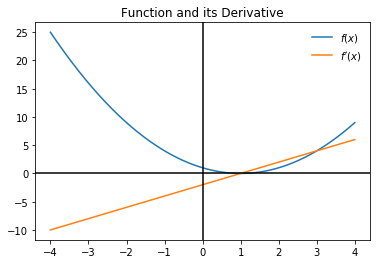

In [519]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(loc = 'best', frameon = False)
plt.title("Function and its Derivative")

In [520]:
def f(x):
    return (x -2)*(x -1) * (x + 1)*(x + 3)*(x +5)

Text(0.5,1,'Another function and its Derivative')

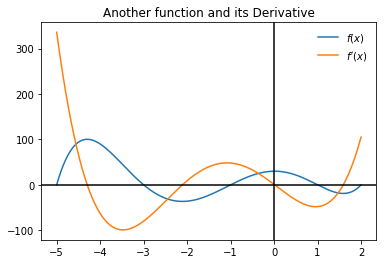

In [521]:
x = np.linspace(-5, 2, 1000)
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(frameon = False)
plt.title("Another function and its Derivative")

We can glean important information from the plot of the derivative about the behavior of the function we are investigating, particularly the maximum and minimum values.  Perhaps we would only have the plot of the derivative, can you tell where the max and min values occur?

Text(0.5,1,'Just the Derivative')

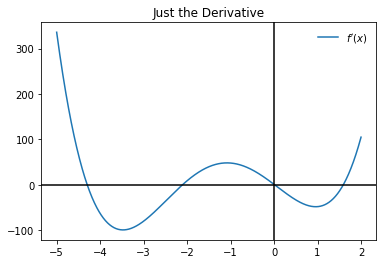

In [522]:
x = np.linspace(-5, 2, 1000)
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(frameon = False)
plt.title("Just the Derivative")

That's ok if you can't, that's where we are going and will be investigated in future labs. 

In [523]:
x = sy.Symbol('x')
df = sy.diff(f(x), x)
df = sy.expand(df)
df

5*x**4 + 24*x**3 - 6*x**2 - 72*x + 1

# Derivative as Tangent Line

We can also interpret the derivative as the slope of a tangent line, or better yet an approximation for this tangent line.  For example, the derivative at some point $a$ can be thought of as the slope of the line through $a$ and some other point $a + \Delta x$ where $\Delta x$ is very small. 

Again, we would have something like:

$$f'(a) = \frac{f(a + \Delta x) - f(a)}{\Delta x}$$

for some arbitrarily small value of $\Delta x$.  We can also understand the expression above as providing us a means of approximating values close to $x = a$ using the tangent line.  If we rearrange terms, notice:

$$f(a + \Delta x) = f'(a)\Delta x + f(a)$$

What this does, is tells us the slope of the line tangent to the graph at the point $(a, f(a))$.  Suppose we have the function $f(x) = x^2$, and we want to know the slope of the tangent line at $x = 2$.  We can define a function as usual, and a function for the derivative.  We can use these to write an equation of the line tangent to the graph of the function at this point.  

In [524]:
def f(x):
    return x**2

def df(x):  # this is estimating the derivative by making h get close to zero
    h = 0.00001
    return (f(x + h) - f(x))/h   

In [525]:
df(2)   #evaluate the derivative at 2

4.000010000027032

## This is important because we just determined that the slope of the tangent line for this function at 2 was 4.  So thinking y=mx+b (the equation of a line) the m=4.

In [526]:
def tan_plot(a):
    x = np.linspace((a-4), (a+4), 1000)
    y = df(a)*(x - a) + f(a)
    plt.plot(x, f(x))  #plots x v. f(x)
    plt.plot(a, f(a), 'o', markersize = 10)  #plots the point at a, which we defined to be 2, and f evaluated at a
    plt.plot(x, y, '--k')  #plots the tangent line 
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')

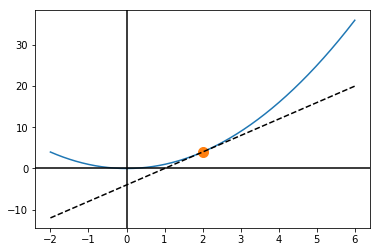

In [527]:
tan_plot(2)

In [528]:
def g(x):
    return x*(x+2)*(x - 3)

def dg(x):
    h = 0.000001
    return ((g(x+h)-g(x))/h)

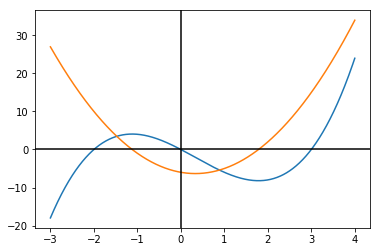

In [529]:
x = np.linspace(-3, 4, 1000)
plt.plot(x, g(x))
plt.plot(x,dg(x))
plt.axhline(color = 'black')
plt.axvline(color = 'black')

In [530]:
x = sy.Symbol('x')
df = sy.diff(g(x), x)
df = sy.simplify(df)
a, b = sy.solve(df, x)

In [531]:
a, b

(1/3 + sqrt(19)/3, -sqrt(19)/3 + 1/3)

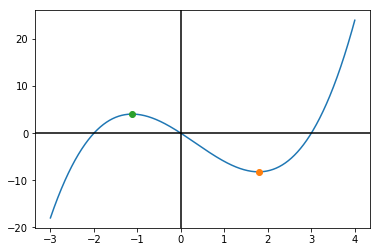

In [532]:
x = np.linspace(-3, 4, 1000)
plt.plot(x, g(x))
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.plot(a, g(a), 'o')
plt.plot(b, g(b), 'o')

In [533]:
def tan_plot(a, b):
    x = np.linspace(-5,5, 1000)
    y1 = dg(a)*(x - a) + g(a)
    y2 = dg(b)*(x - b) + g(b)
    plt.plot(x, g(x))
    plt.plot(a, g(a), 'o', markersize = 10)
    plt.plot(b, g(b), 'o', markersize = 10)
    plt.plot(x, y1, '--k')
    plt.plot(x, y2, '--k')
    plt.ylim(-15, 15)
    plt.xlim(-4,4)
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')

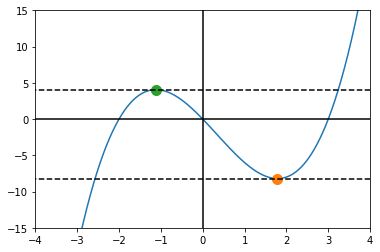

In [534]:
tan_plot(a, b)

This will lead us somewhere important next lab.

Reminder: The Definition of the derivative 

$$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$



# Finding Derivatives
If we know the function how can we figure out what the derivaitve of that function is?  Later we will need to be using derivatives for applications, so we need to figure out how to find the derivative. 
Let's look at several examples:

In [535]:
x=sy.Symbol('x')
def f(x):
    return x


In [536]:
sy.diff(f(x),x)

1

In [537]:
def g(x):
    return 2*x

In [538]:
sy.diff(g(x),x)

2

In [539]:
def h(x): 
    return 3*x+7

In [540]:
sy.diff(h(x),x)

3

These were all linear functions.  What were their derivaitves?

In [541]:
def a(x):
    return 1

    
def b(x):
    return x
    
def c(x):
    return x**2

def d(x):
    return x**3

def f(x):
    return x**4


In [542]:
sy.diff(a(x),x)


0

In [543]:
sy.diff(b(x),x)

1

In [544]:
sy.diff(c(x),x)

2*x

In [545]:
sy.diff(d(x),x)

3*x**2

In [546]:
sy.diff(f(x),x)

4*x**3

Noting this pattern what do you think the derivative of $x^5$ is?

What is the rule for this?

**The Power Rule** :






Now let's take a look at multiplication

In [547]:
def f(x):
    return (2*x+1)*(3*x+4)

In [548]:
sy.diff(f(x),x)


12*x + 11

In [549]:
def f(x):
    return (x**2+3*x+1)*(x**3+4)

In [550]:
d1=sy.diff(f(x),x)
d1

3*x**2*(x**2 + 3*x + 1) + (2*x + 3)*(x**3 + 4)

What seemed to happen there?

What's the rule for this?

**The Product Rule**


Now let's take a look at division.

In [551]:
def f(x):
    return (x**2+3*x+1)/(x**3+4)

In [552]:
d1=sy.diff(f(x),x)
d1

-3*x**2*(x**2 + 3*x + 1)/(x**3 + 4)**2 + (2*x + 3)/(x**3 + 4)

In [553]:
sy.simplify(d1)

(-3*x**2*(x**2 + 3*x + 1) + (2*x + 3)*(x**3 + 4))/(x**3 + 4)**2

Let's look at another division


In [554]:
def g(x):
    return (x**5+x**3+4*x+2)/(x**10+4*x**3)

In [555]:
d3=sy.diff(g(x),x)
d3

(-10*x**9 - 12*x**2)*(x**5 + x**3 + 4*x + 2)/(x**10 + 4*x**3)**2 + (5*x**4 + 3*x**2 + 4)/(x**10 + 4*x**3)

In [556]:
sy.simplify(d3)

(-5*x**12 - 7*x**10 - 36*x**8 - 20*x**7 + 8*x**5 - 32*x - 24)/(x**4*(x**14 + 8*x**7 + 16))

What might have happened there?

** The Quotient Rule** :



Functions can be formed by combining other functions through famililar operations.  For example, we can consider the polynomial $h(x) = x^3 + x^2$ as formed by two simpler polynomials $f(x) = x^3$ and $g(x) = x^2$ combined through addition.  So far, we have not had to worry about this, as differentiation and integration are linear operators that work across addition and subtraction.

If we instead have a function $h$ given by:

$$h(x) = \sqrt{x^3 + x^2}$$

we may recognize the square root function and the polynomial inside of it.  This was not formed by addition, subtraction, multiplication, or division of simpler functions however.  Instead, we can understand the function $h$ as formed by **composing** two functions $f$ and $g$ where:

$$h(x) = \sqrt{x^3 + x^2} \quad f(u) = \sqrt(u) \quad g(x) = x^3 + x^2$$

The operation of composition means we apply the function $f$ to the function $g$.  We would write this as

$$f(g(x)) = \sqrt{(g(x))} = \sqrt{x^3 + x^2}$$

We can use SymPy to explore a few examples and determine a general rule for differentiating functions formed by compositions.  We begin with trying to generalize the situation above, where we compose some function $g$ into a function $f$ of the form

$$f(x) = (g(x))^n$$

It seems reasonable to expect that 

$$f'(x) = n(g(x))^{n-1}$$

You need to adjust this statement to make it true.  Consider the following examples, use sympy to differentiate them and determine the remaining terms.

1. $(x^2 - 3x)^2$

2. $(x^2 - 3x)^3$

3. $\sqrt{x^2 - 3x}$

In [557]:
x = sy.Symbol('x')
y1 = (x**2 - 3*x)**2
y2 = (x**2 - 3*x)**3
y3 = (x**2 - 3*x)**(1/2)

In [558]:
dy1 = sy.diff(y1, x)
sy.factor(dy1)

2*x*(x - 3)*(2*x - 3)

In [559]:
dy2 = sy.diff(y2, x)
sy.factor(dy2)

3*x**2*(x - 3)**2*(2*x - 3)

In [560]:
dy3 = sy.diff(y3, x)
dy3

(1.0*x - 1.5)*(x**2 - 3*x)**(-0.5)

What might that rule be?

**The Chain Rule**:


# For You To Do

# NAME:   

## 1. 
The total world-wide box office receipts for a long-running blockbuster moview are approximated by the function 
$$ T(x)=\frac{120x^2}{x^2+4}$$ where $T(x)$ is meausred in millions of dollars and $x$ is the number of months since the movie's release. 


   (a) What are the total box office receipts after the first month?  The second month? The third month? (Use what we have learned in notebooks 1 and 2 to do this easily)
           
   (b)  What will the movie gross in the long run?  Interpret your results in words. 

## 2. 
Explore the other examples and see if you can investigate some connections between kinds of functions $f$, their  differences $v$, and then their differences adding many points.  Plot the function on one graph and plot the differences in another plot beside it.  Hint look in the connections to slope and adding more points section. 

    a.  f(x)=x^3
    
    b.  g(x)=e^x

## 3. 
DJ's Tires has determined that the weekly demand for tires is given by $$p=f(x)=144-x^2$$ where $p$, the price per tire, measured in dollars and $x$ is measured in units of 1000.  

   (a) Plot the demand function.  (I only want to see a plot with x values that make sense)  Label your plots and axes
    
   (b) Plot the differences of the demand function  
    
   (c) Find the average rate of change in the unit price of a tire if the quantity demanded is between 5000 and 6000 tires, 5000 and 5100 tires, and 5000 and 5010 tires. 
    
   (d) What is the instantaneous rate of change of the unit price when the quantity demanded is 5000 units? Interpret your results in words. 
    

## 4.
A company's quarterly profit (in thousands of dollars) is given by $$ P(x)= \frac{1}{3}x^2+7x+30$$ when $x$ is between 0 and 50 inclusive and $x$ is the amount of money spend on advertising per quarter in thousands of dollars.  Label your plots and axes on all plots below. 

   (a) Plot the company's profit and the change in profit (differences) on two graphs beside each other
    
   (b) What is the rate of change of the company's quarterly profit is the amount it spends on advertising is \$10,000 per quarter and then at \$30,000 per quarter?
    
   (c)  Plot the company's profit and the function modeling the rate of change (it's derivative) on the same graph. 
    
   (d) Plot the company's profit function and the tangent line at the \$10,000 spent per quarter (x=10) on the same graph

## 5. 
Find the equation of the tangent line for $f(x)=x^2-4x$ when x= -12
Hint we found the slope of the tangent line earlier but didn't write the whole equation, but you know how to write the equation of a line if you know the slope and a point it goes through. 


## 6.  
The estimated number of digital TV shipments between the years 2000 and 2006 (in millons of units) are as follows

|Units Shipped  | 0.63|1.43|2.57|4.1|6|8.1|10|
|---------------|----|---|----|----|----|--|----|
|Year,t         | 2000  | 2001 | 2002  | 2003  | 2004  | 2005| 2006  |

First plot the years (t) v. units shipped (y) 






Decide on what this data looks like (linear, quadratic, or exponential) and then fit a curve to it.  






Then determine the rate of change of units shipped in the year 2004.  



If the trend for digital tvs shipped continued to now, how many would be shipped AND what would the rate of change be at this year?  

## 7. 
The  data in the CSV file on blackboard, has Years, Sales in Pounds, Sales in Dollars, and Advertising and Promotional Expenditures for smokeless tobacco products from 1985-2015. 


In [561]:
import csv 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon
import datetime as dt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

In [562]:
df=pd.read_csv("smokelesstobacco.csv")  
print(df)

    Year       Pounds       Sales  Advertising (dollars)
0   2000  111,741,335  1988875535              224582757
1   2001  112,193,550  2127520387              236676917
2   2002  112,148,366  2362166931              234645000
3   2003  112,924,505  2489501857              242514000
4   2004  116,768,672  2617388686              231084000
5   2005  116,197,005  2611292547              250792000
6   2006  115,818,739  2593436592              354123000
7   2007  118,234,763  2695462138              411239000
8   2008  119,915,125  2757087244              547873000
9   2009  117,693,273  2611908686              493071000
10  2010  120,522,070  2780437133              444494000
11  2011  122,735,863  2936852337              451985000
12  2012  125,496,642  3077403248              435927000
13  2013  128,043,919  3263105347              503161000
14  2014  127,810,528  3415702358              600786000
15  2015  129,363,158  3680195446              684938000
16  2016  131,433,651  39819028

Text(0,0.5,'Sales in Billions of Dollars')

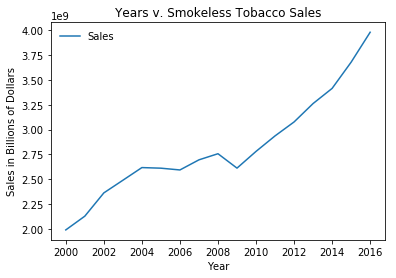

In [563]:
x=df.Year
y=df.Sales
plt.plot(x,y)
plt.title("Years v. Smokeless Tobacco Sales")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Year")
plt.ylabel("Sales in Billions of Dollars")



From the graph where does the rate of change seem to be the greatest?  

Use the np.polyfit and different degree polynomials to try to fit a curve that models this data.  Then find its derivative and use that to estimate the rate of change in sales in the year 2015. 

# Think about what you learned today and write about it! 
Write a short paragraph about what you learned in this notebook.  This needs to be a thoughtful, reflective paragraph.  There should be reflection on the mathematics content you learned.  
You may want to review the goals of this notebook (at the top)


### Please name your file following this set up:  lastname_firstname_lab_three.ipynb

**Note: where I have name of your file written you actually need to write the name of your file.  Also make sure the name has no spaces.**

# Please submit the .ipynb file on Blackboard and please print the portion from "For You to Do" to the end and then do print preview, save as pdf. 
Please make sure you are submitting the correct type of file (.ipynb) and that it is named correctly or points will be deducted. 